In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

In [2]:
x_train=pd.read_csv("ERA\\ERA_train_x.csv")
y_train=pd.read_csv("ERA\\ERA_train_y.csv")
x_test=pd.read_csv("ERA\\ERA_test_x.csv")
y_test=pd.read_csv("ERA\\ERA_test_y.csv")

In [3]:
x_train=x_train.drop(columns=["T_ID", "YEAR"])
y_train=y_train.drop(columns=["T_ID", "YEAR"])
x_test=x_test.drop(columns=["T_ID", "YEAR"])
y_test=y_test.drop(columns=["T_ID", "YEAR"])

In [4]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [5]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

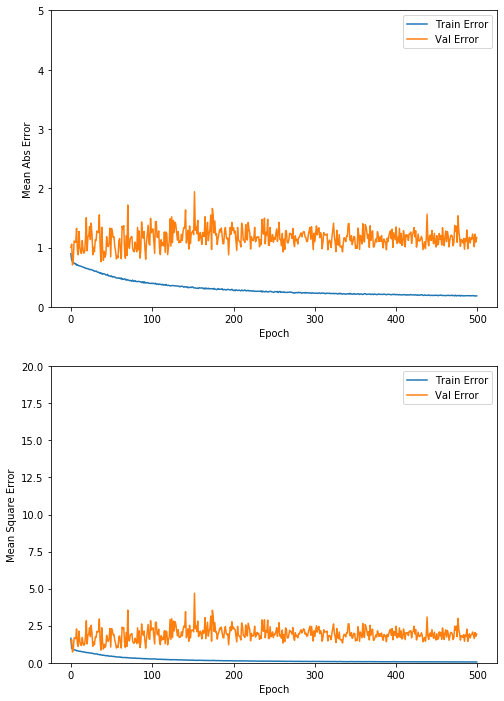

In [7]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [9]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} ".format(mae))

50/50 - 0s - loss: 1.2728 - mae: 0.9357 - mse: 1.2728
테스트 세트의 평균 절대 오차:  0.94 


In [10]:
pred=model.predict(x_test)
y_test["pred"]=pred
y_test

,ERA,pred
0,5.258114,5.219099
1,4.120827,4.886452
2,6.314516,5.870659
3,3.649770,5.280866
4,5.849294,6.352991
5,3.575342,5.575498
6,4.710280,5.974331
7,5.144882,5.143471
8,5.400000,6.302186
9,5.704839,5.230786
